In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("strava_full_data.csv")

In [3]:
df['type'].value_counts()

type
Run               924
Ride              152
Hike               21
Swim               17
Yoga                2
WeightTraining      2
Walk                1
AlpineSki           1
RockClimbing        1
Name: count, dtype: int64

In [4]:
df.head()

,Unnamed: 0,average_speed,max_speed,average_heartrate,max_heartrate,distance,elapsed_time,moving_time,total_elevation_gain,elev_high,type,start_date_local,kudos_count
0,0,3.142,5.3,NaN,NaN,11443.2,1:03:50,1:00:42,73.0,115.0,Run,2020-01-18T12:00:36,12
1,1,3.410,7.4,NaN,NaN,9486.0,0:48:51,0:46:22,36.1,96.9,Run,2020-01-17T19:00:58,13
2,2,3.273,4.0,NaN,NaN,8854.8,0:45:32,0:45:05,16.0,117.2,Run,2020-01-13T18:37:29,3
3,3,3.259,4.0,NaN,NaN,7717.5,0:39:35,0:39:28,10.0,131.6,Run,2020-01-10T18:36:52,2
4,4,3.222,4.0,NaN,NaN,7659.5,0:41:33,0:39:37,12.0,107.4,Run,2020-01-08T18:37:24,17


In [5]:
df.shape

(1121, 13)

In [6]:
df = df[df['type'].isin(['Run','Ride'])]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1076 entries, 0 to 1120
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1076 non-null   int64  
 1   average_speed         1076 non-null   float64
 2   max_speed             1076 non-null   float64
 3   average_heartrate     190 non-null    float64
 4   max_heartrate         190 non-null    float64
 5   distance              1076 non-null   float64
 6   elapsed_time          1075 non-null   object 
 7   moving_time           1075 non-null   object 
 8   total_elevation_gain  1076 non-null   float64
 9   elev_high             1054 non-null   float64
 10  type                  1076 non-null   object 
 11  start_date_local      1076 non-null   object 
 12  kudos_count           1076 non-null   int64  
dtypes: float64(7), int64(2), object(4)
memory usage: 117.7+ KB


In [8]:
df.drop(['average_heartrate','max_heartrate','Unnamed: 0'], axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1076 entries, 0 to 1120
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   average_speed         1076 non-null   float64
 1   max_speed             1076 non-null   float64
 2   distance              1076 non-null   float64
 3   elapsed_time          1075 non-null   object 
 4   moving_time           1075 non-null   object 
 5   total_elevation_gain  1076 non-null   float64
 6   elev_high             1054 non-null   float64
 7   type                  1076 non-null   object 
 8   start_date_local      1076 non-null   object 
 9   kudos_count           1076 non-null   int64  
dtypes: float64(5), int64(1), object(4)
memory usage: 92.5+ KB


In [10]:
df['elev_high'] = df['elev_high'].fillna(value=0)

In [11]:
df.dropna(inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1075 entries, 0 to 1120
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   average_speed         1075 non-null   float64
 1   max_speed             1075 non-null   float64
 2   distance              1075 non-null   float64
 3   elapsed_time          1075 non-null   object 
 4   moving_time           1075 non-null   object 
 5   total_elevation_gain  1075 non-null   float64
 6   elev_high             1075 non-null   float64
 7   type                  1075 non-null   object 
 8   start_date_local      1075 non-null   object 
 9   kudos_count           1075 non-null   int64  
dtypes: float64(5), int64(1), object(4)
memory usage: 92.4+ KB


In [13]:
df['distance'] = df['distance']/1000
df['distance'] = df['distance'].round(2)

df['average_speed'] = 1/(df['average_speed']/100*6)
df['average_speed'] = df['average_speed'].round(2)

df['max_speed'] = 1/(df['max_speed']/100*6)
df['max_speed'] = df['max_speed'].round(2)

In [14]:
df['elapsed_time'].str.len().value_counts()

elapsed_time
7     1065
8        6
15       2
14       2
Name: count, dtype: int64

In [15]:
df[df['elapsed_time'].str.len() == 14]

,average_speed,max_speed,distance,elapsed_time,moving_time,total_elevation_gain,elev_high,type,start_date_local,kudos_count
215,5.04,3.7,9.06,"1 day, 1:11:23",0:45:41,71.0,114.0,Run,2019-04-02T17:19:47,12
559,6.26,3.4,5.73,"1 day, 0:01:33",0:35:52,8.0,150.6,Run,2017-07-11T19:02:56,7


In [17]:
df.loc[215, 'elapsed_time'] = df.loc[215, 'moving_time']

In [19]:
df.at[559, 'elapsed_time'] = df.loc[559, 'moving_time']

In [20]:
df[df['elapsed_time'].str.len() == 15]

,average_speed,max_speed,distance,elapsed_time,moving_time,total_elevation_gain,elev_high,type,start_date_local,kudos_count
208,5.54,4.07,4.93,"2 days, 6:26:01",0:27:18,2.0,106.0,Run,2019-04-07T12:14:27,10
444,5.51,3.09,4.02,"1 day, 18:28:17",0:22:09,21.0,82.6,Run,2018-06-30T11:45:43,3


In [22]:
df.at[208, 'elapsed_time'] = df.loc[208, 'moving_time']
df.at[444, 'elapsed_time'] = df.loc[444, 'moving_time']

In [23]:
def to_minutes(str):
    return sum(i*j for i, j in zip(map(float, str.split(':')), [60, 1, 1/60]))

df['time_min_elapsed'] = df['elapsed_time'].apply(to_minutes)
df['time_min_moving'] = df['moving_time'].apply(to_minutes)

df['time_min_elapsed'] = df['time_min_elapsed'].round(2)
df['time_min_moving'] = df['time_min_moving'].round(2)

In [24]:
df['start_date_local'] = pd.to_datetime(df['start_date_local'])

In [25]:
df

,average_speed,max_speed,distance,elapsed_time,moving_time,total_elevation_gain,elev_high,type,start_date_local,kudos_count,time_min_elapsed,time_min_moving
0,5.30,3.14,11.44,1:03:50,1:00:42,73.0,115.0,Run,2020-01-18 12:00:36,12,63.83,60.70
1,4.89,2.25,9.49,0:48:51,0:46:22,36.1,96.9,Run,2020-01-17 19:00:58,13,48.85,46.37
2,5.09,4.17,8.85,0:45:32,0:45:05,16.0,117.2,Run,2020-01-13 18:37:29,3,45.53,45.08
3,5.11,4.17,7.72,0:39:35,0:39:28,10.0,131.6,Run,2020-01-10 18:36:52,2,39.58,39.47
4,5.17,4.17,7.66,0:41:33,0:39:37,12.0,107.4,Run,2020-01-08 18:37:24,17,41.55,39.62
...,...,...,...,...,...,...,...,...,...,...,...,...
1116,6.96,2.53,12.68,1:31:05,1:28:16,11.1,92.0,Run,2016-03-05 11:10:45,0,91.08,88.27
1117,5.17,2.98,10.90,1:07:59,0:56:22,25.9,111.8,Run,2016-03-04 12:00:49,0,67.98,56.37
1118,4.53,2.31,16.43,1:21:25,1:14:27,56.8,120.7,Run,2016-02-03 07:33:56,0,81.42,74.45
1119,5.04,2.73,10.99,1:03:22,0:55:20,14.7,112.0,Run,2016-02-02 14:28:05,0,63.37,55.33


In [26]:
df.groupby('type')['distance'].nlargest(3)

type      
Ride  1061     74.56
      355      67.64
      223      60.97
Run   814     121.66
      1120    103.25
      565     103.11
Name: distance, dtype: float64

In [27]:
df.groupby('type')['time_min_elapsed'].nlargest(3)

type     
Ride  223     495.65
      355     349.62
      109     310.38
Run   565    1043.62
      97     1010.53
      814     911.52
Name: time_min_elapsed, dtype: float64

In [28]:
df.loc[1061,:]

average_speed                          2.91
max_speed                              0.58
distance                              74.56
elapsed_time                        4:49:00
moving_time                         3:36:57
total_elevation_gain                  459.1
elev_high                             194.2
type                                   Ride
start_date_local        2016-05-09 15:30:13
kudos_count                               0
time_min_elapsed                      289.0
time_min_moving                      216.95
Name: 1061, dtype: object

In [29]:
data = df[df['type'] == 'Run']

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

C:\Users\Baraa Ehab\AppData\Local\Temp\ipykernel_17952\3784617568.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['total_elevation_gain']);


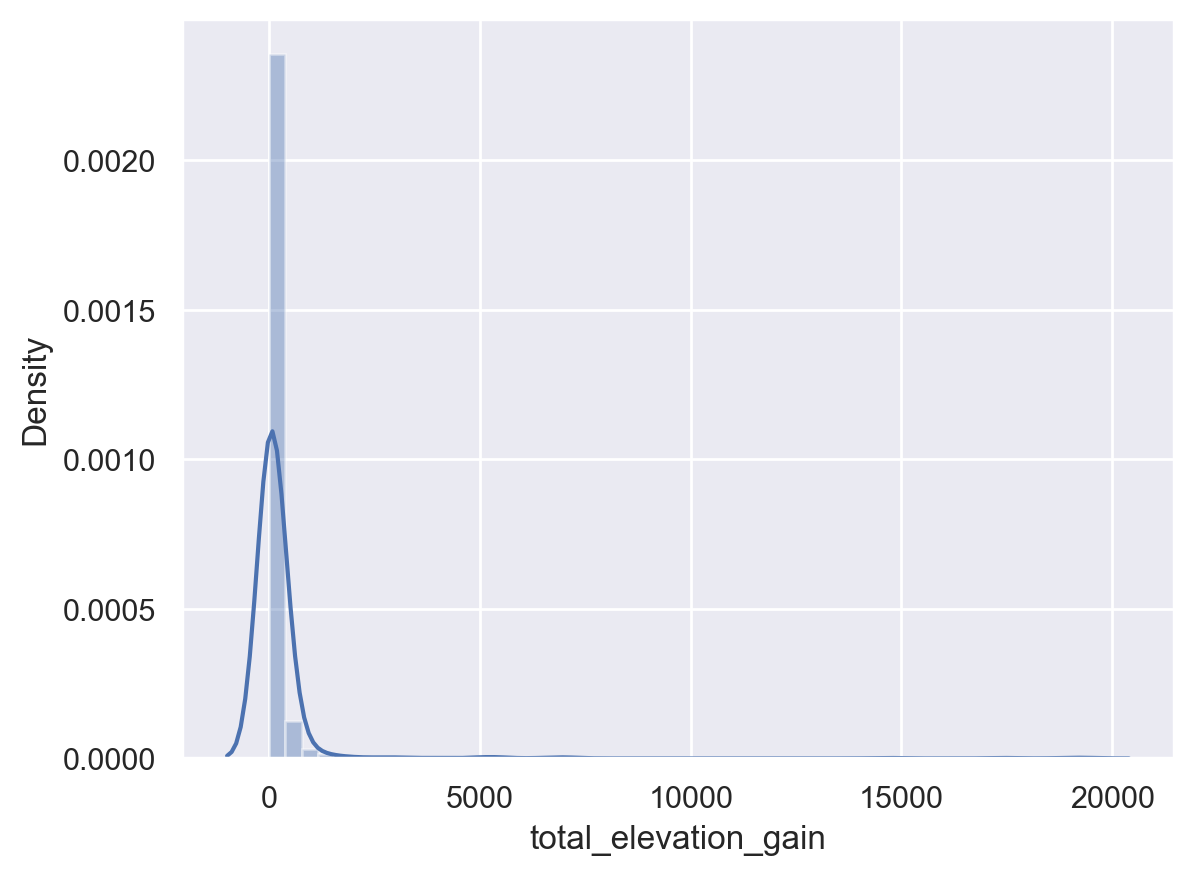

In [31]:
%config InlineBackend.figure_format = 'retina'
sns.distplot(data['total_elevation_gain']);

In [32]:
import numpy as np

In [33]:
data.apply(np.max)

average_speed                        196.08
max_speed                               inf
distance                             121.66
elapsed_time                        9:33:51
moving_time                         6:53:02
total_elevation_gain                19401.0
elev_high                           12605.6
type                                    Run
start_date_local        2020-01-18 12:00:36
kudos_count                              32
time_min_elapsed                    1043.62
time_min_moving                      965.57
dtype: object

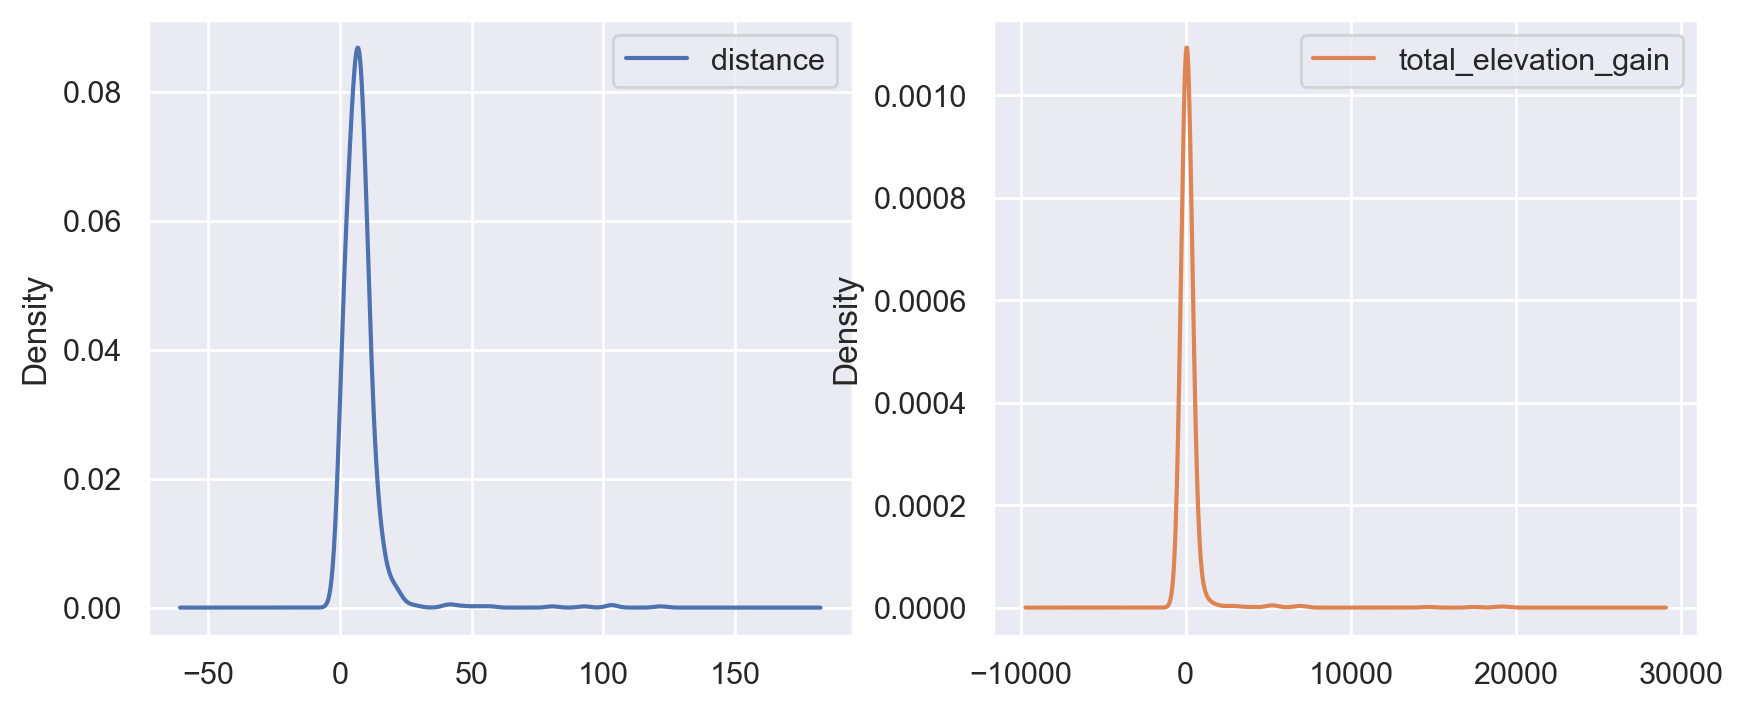

In [34]:
features = ['distance', 'total_elevation_gain']
data[features].plot(kind='density', subplots=True, layout=(1, 2), 
                  sharex=False, figsize=(10, 4));

In [35]:
data

,average_speed,max_speed,distance,elapsed_time,moving_time,total_elevation_gain,elev_high,type,start_date_local,kudos_count,time_min_elapsed,time_min_moving
0,5.30,3.14,11.44,1:03:50,1:00:42,73.0,115.0,Run,2020-01-18 12:00:36,12,63.83,60.70
1,4.89,2.25,9.49,0:48:51,0:46:22,36.1,96.9,Run,2020-01-17 19:00:58,13,48.85,46.37
2,5.09,4.17,8.85,0:45:32,0:45:05,16.0,117.2,Run,2020-01-13 18:37:29,3,45.53,45.08
3,5.11,4.17,7.72,0:39:35,0:39:28,10.0,131.6,Run,2020-01-10 18:36:52,2,39.58,39.47
4,5.17,4.17,7.66,0:41:33,0:39:37,12.0,107.4,Run,2020-01-08 18:37:24,17,41.55,39.62
...,...,...,...,...,...,...,...,...,...,...,...,...
1116,6.96,2.53,12.68,1:31:05,1:28:16,11.1,92.0,Run,2016-03-05 11:10:45,0,91.08,88.27
1117,5.17,2.98,10.90,1:07:59,0:56:22,25.9,111.8,Run,2016-03-04 12:00:49,0,67.98,56.37
1118,4.53,2.31,16.43,1:21:25,1:14:27,56.8,120.7,Run,2016-02-03 07:33:56,0,81.42,74.45
1119,5.04,2.73,10.99,1:03:22,0:55:20,14.7,112.0,Run,2016-02-02 14:28:05,0,63.37,55.33


In [36]:
data = data.drop(['elapsed_time', 'moving_time','type','kudos_count'], axis=1)

In [37]:
data

,average_speed,max_speed,distance,total_elevation_gain,elev_high,start_date_local,time_min_elapsed,time_min_moving
0,5.30,3.14,11.44,73.0,115.0,2020-01-18 12:00:36,63.83,60.70
1,4.89,2.25,9.49,36.1,96.9,2020-01-17 19:00:58,48.85,46.37
2,5.09,4.17,8.85,16.0,117.2,2020-01-13 18:37:29,45.53,45.08
3,5.11,4.17,7.72,10.0,131.6,2020-01-10 18:36:52,39.58,39.47
4,5.17,4.17,7.66,12.0,107.4,2020-01-08 18:37:24,41.55,39.62
...,...,...,...,...,...,...,...,...
1116,6.96,2.53,12.68,11.1,92.0,2016-03-05 11:10:45,91.08,88.27
1117,5.17,2.98,10.90,25.9,111.8,2016-03-04 12:00:49,67.98,56.37
1118,4.53,2.31,16.43,56.8,120.7,2016-02-03 07:33:56,81.42,74.45
1119,5.04,2.73,10.99,14.7,112.0,2016-02-02 14:28:05,63.37,55.33


In [38]:
data.set_index('start_date_local', inplace=True)
data.head()

,average_speed,max_speed,distance,total_elevation_gain,elev_high,time_min_elapsed,time_min_moving
start_date_local,,,,,,,
2020-01-18 12:00:36,5.30,3.14,11.44,73.0,115.0,63.83,60.70
2020-01-17 19:00:58,4.89,2.25,9.49,36.1,96.9,48.85,46.37
2020-01-13 18:37:29,5.09,4.17,8.85,16.0,117.2,45.53,45.08
2020-01-10 18:36:52,5.11,4.17,7.72,10.0,131.6,39.58,39.47
2020-01-08 18:37:24,5.17,4.17,7.66,12.0,107.4,41.55,39.62


In [39]:
data.index

DatetimeIndex(['2020-01-18 12:00:36', '2020-01-17 19:00:58',
               '2020-01-13 18:37:29', '2020-01-10 18:36:52',
               '2020-01-08 18:37:24', '2020-01-06 12:47:23',
               '2020-01-05 13:34:19', '2020-01-04 10:59:50',
               '2020-01-04 10:34:54', '2020-01-03 18:11:25',
               ...
               '2016-03-13 10:01:13', '2016-03-11 17:11:28',
               '2016-03-09 12:51:24', '2016-03-08 20:02:57',
               '2016-03-06 11:10:30', '2016-03-05 11:10:45',
               '2016-03-04 12:00:49', '2016-02-03 07:33:56',
               '2016-02-02 14:28:05', '2010-01-01 01:00:00'],
              dtype='datetime64[ns]', name='start_date_local', length=923, freq=None)

In [40]:
data.isnull().sum()

average_speed           0
max_speed               0
distance                0
total_elevation_gain    0
elev_high               0
time_min_elapsed        0
time_min_moving         0
dtype: int64

In [41]:
data.max()

average_speed             196.08
max_speed                    inf
distance                  121.66
total_elevation_gain    19401.00
elev_high               12605.60
time_min_elapsed         1043.62
time_min_moving           965.57
dtype: float64

In [42]:
data[data['max_speed'] == data['max_speed'].max()]

,average_speed,max_speed,distance,total_elevation_gain,elev_high,time_min_elapsed,time_min_moving
start_date_local,,,,,,,
2019-02-27 20:21:52,5.26,inf,3.80,0.0,0.0,20.00,20.00
2019-02-26 18:50:00,8.62,inf,5.80,0.0,0.0,50.00,50.00
2019-02-25 18:31:46,10.00,inf,3.10,0.0,0.0,31.00,31.00
2019-01-21 17:27:27,9.09,inf,3.30,0.0,0.0,30.00,30.00
2019-01-09 19:07:17,6.34,inf,7.10,0.0,0.0,45.00,45.00
2019-01-03 19:39:11,8.17,inf,4.90,0.0,0.0,40.03,40.03
2018-12-31 13:26:00,4.56,inf,9.00,0.0,0.0,41.07,41.07
2018-09-09 12:35:18,5.25,inf,4.00,0.0,0.0,21.00,21.00
2018-07-05 18:32:00,5.00,inf,5.60,0.0,0.0,28.00,28.00


In [43]:
data = data.drop(['max_speed'], axis=1)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


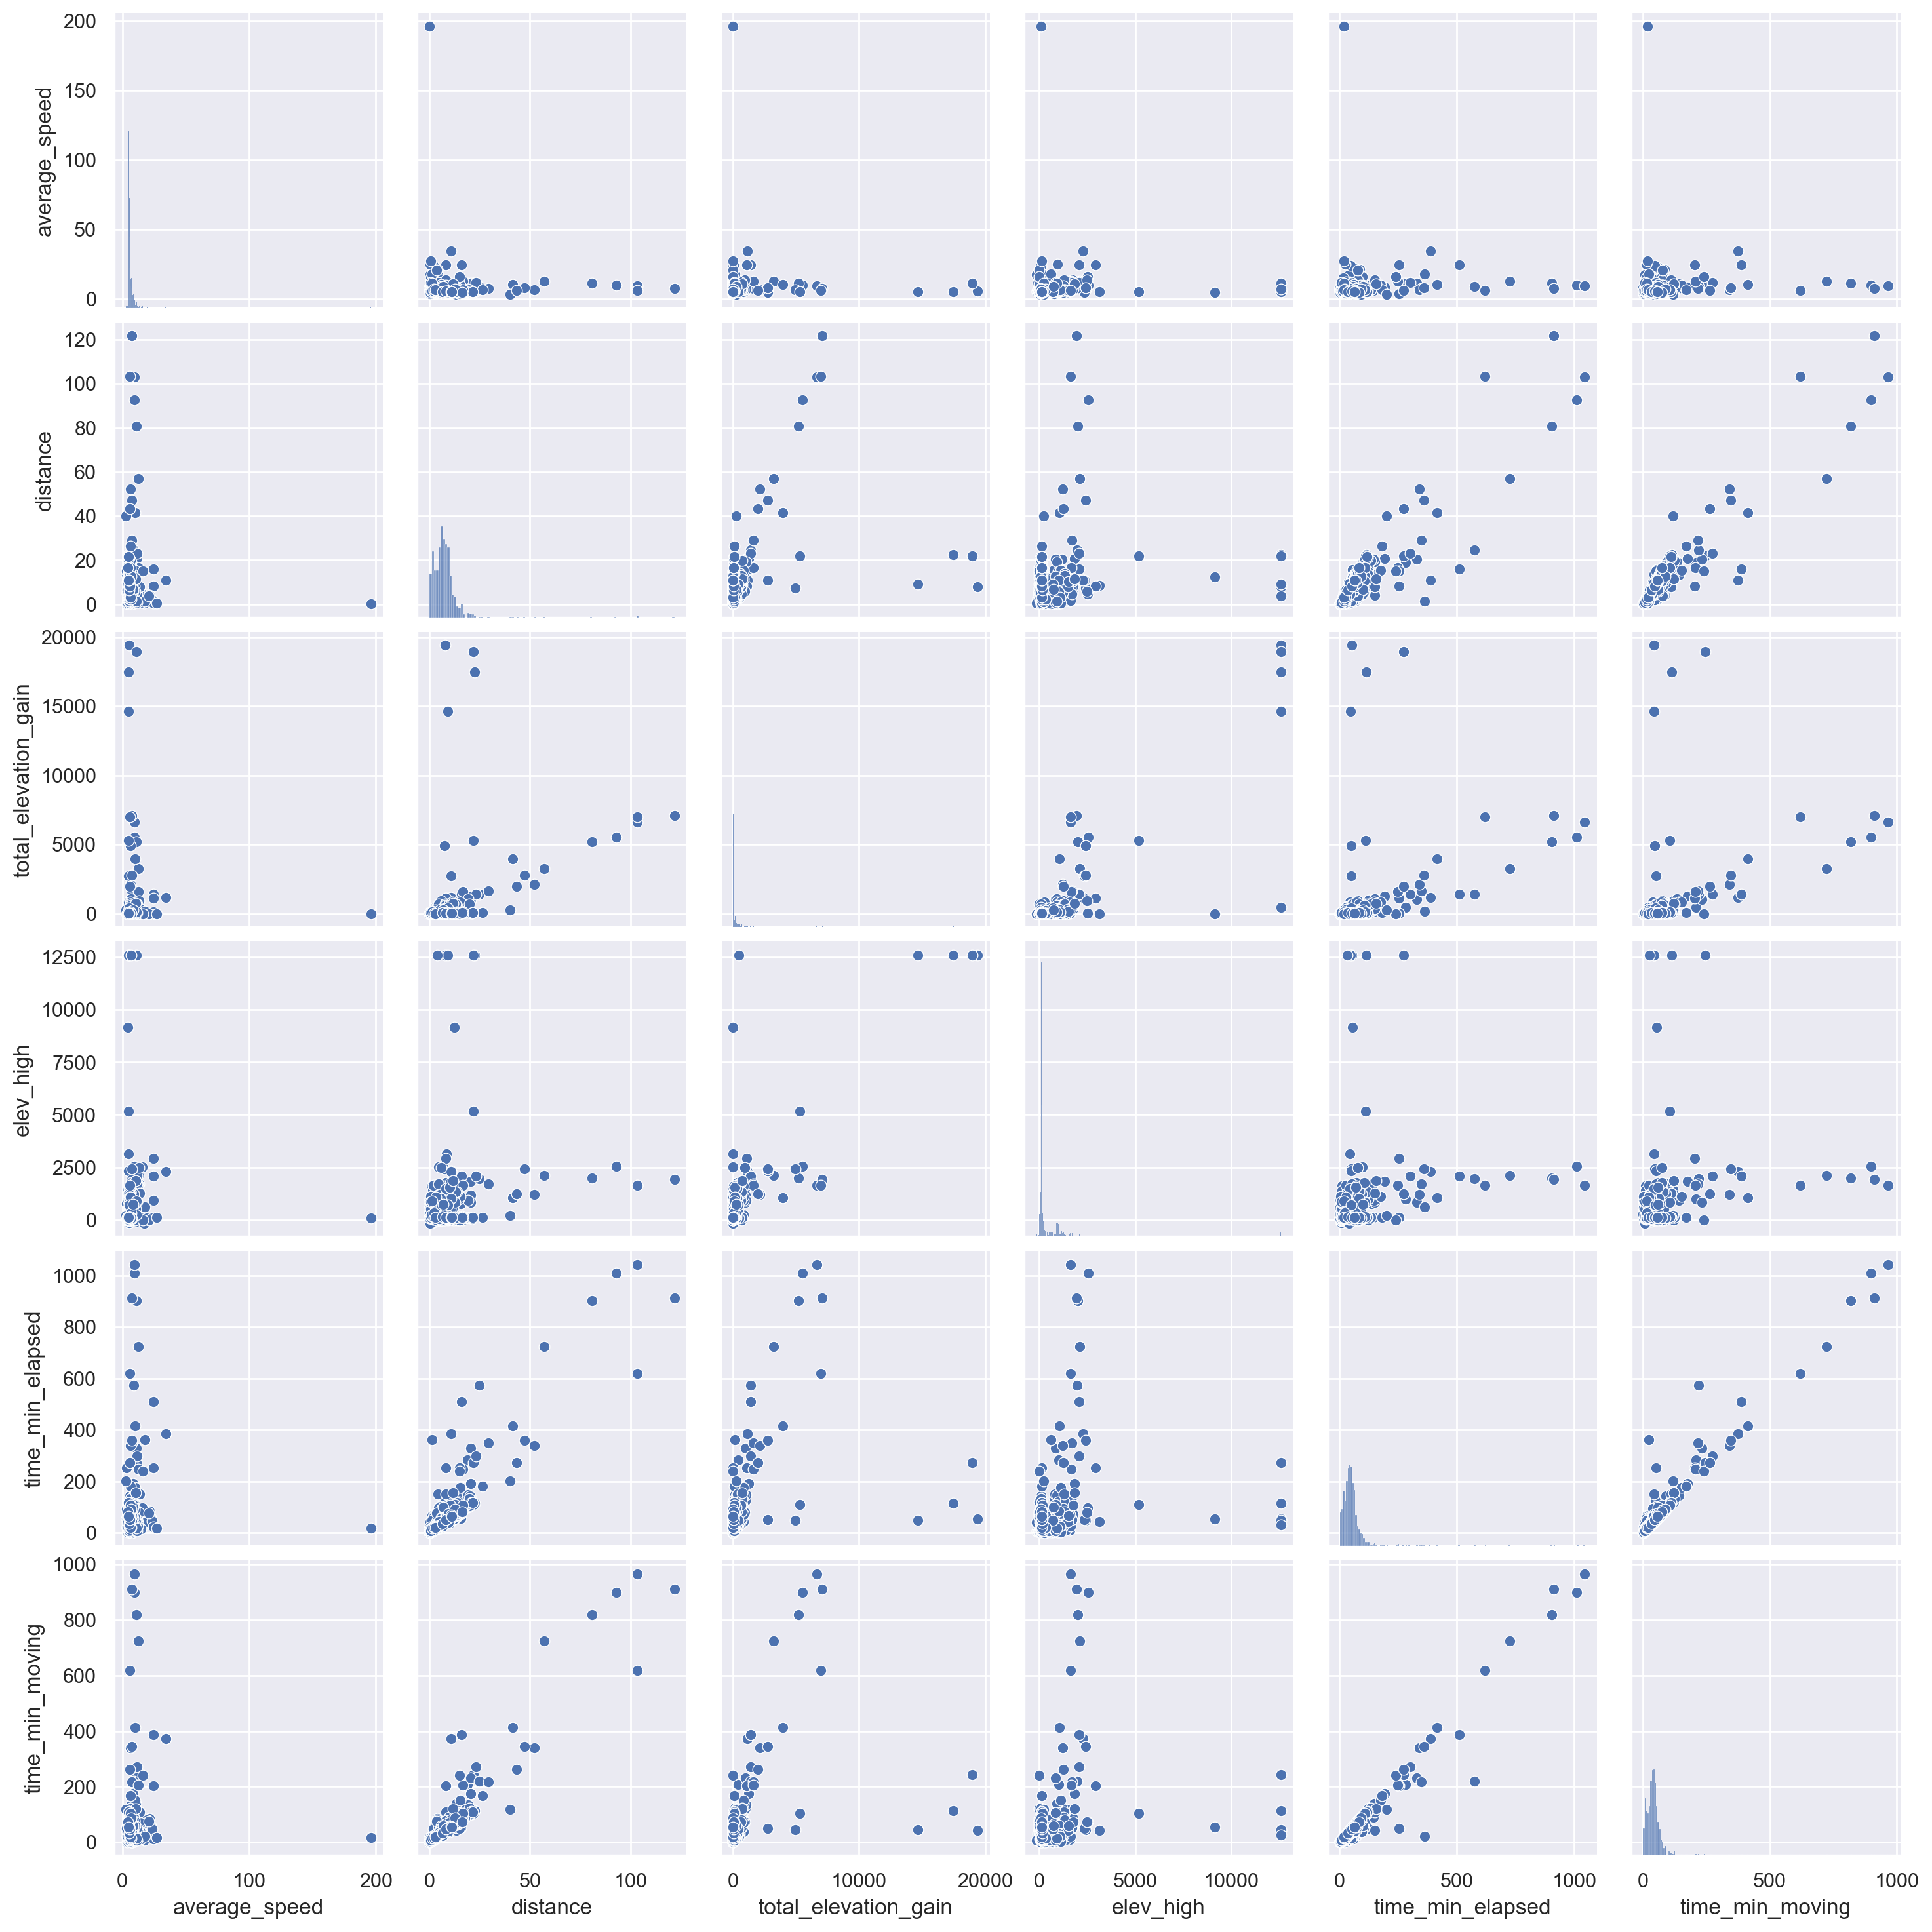

In [44]:
sns.pairplot(data)

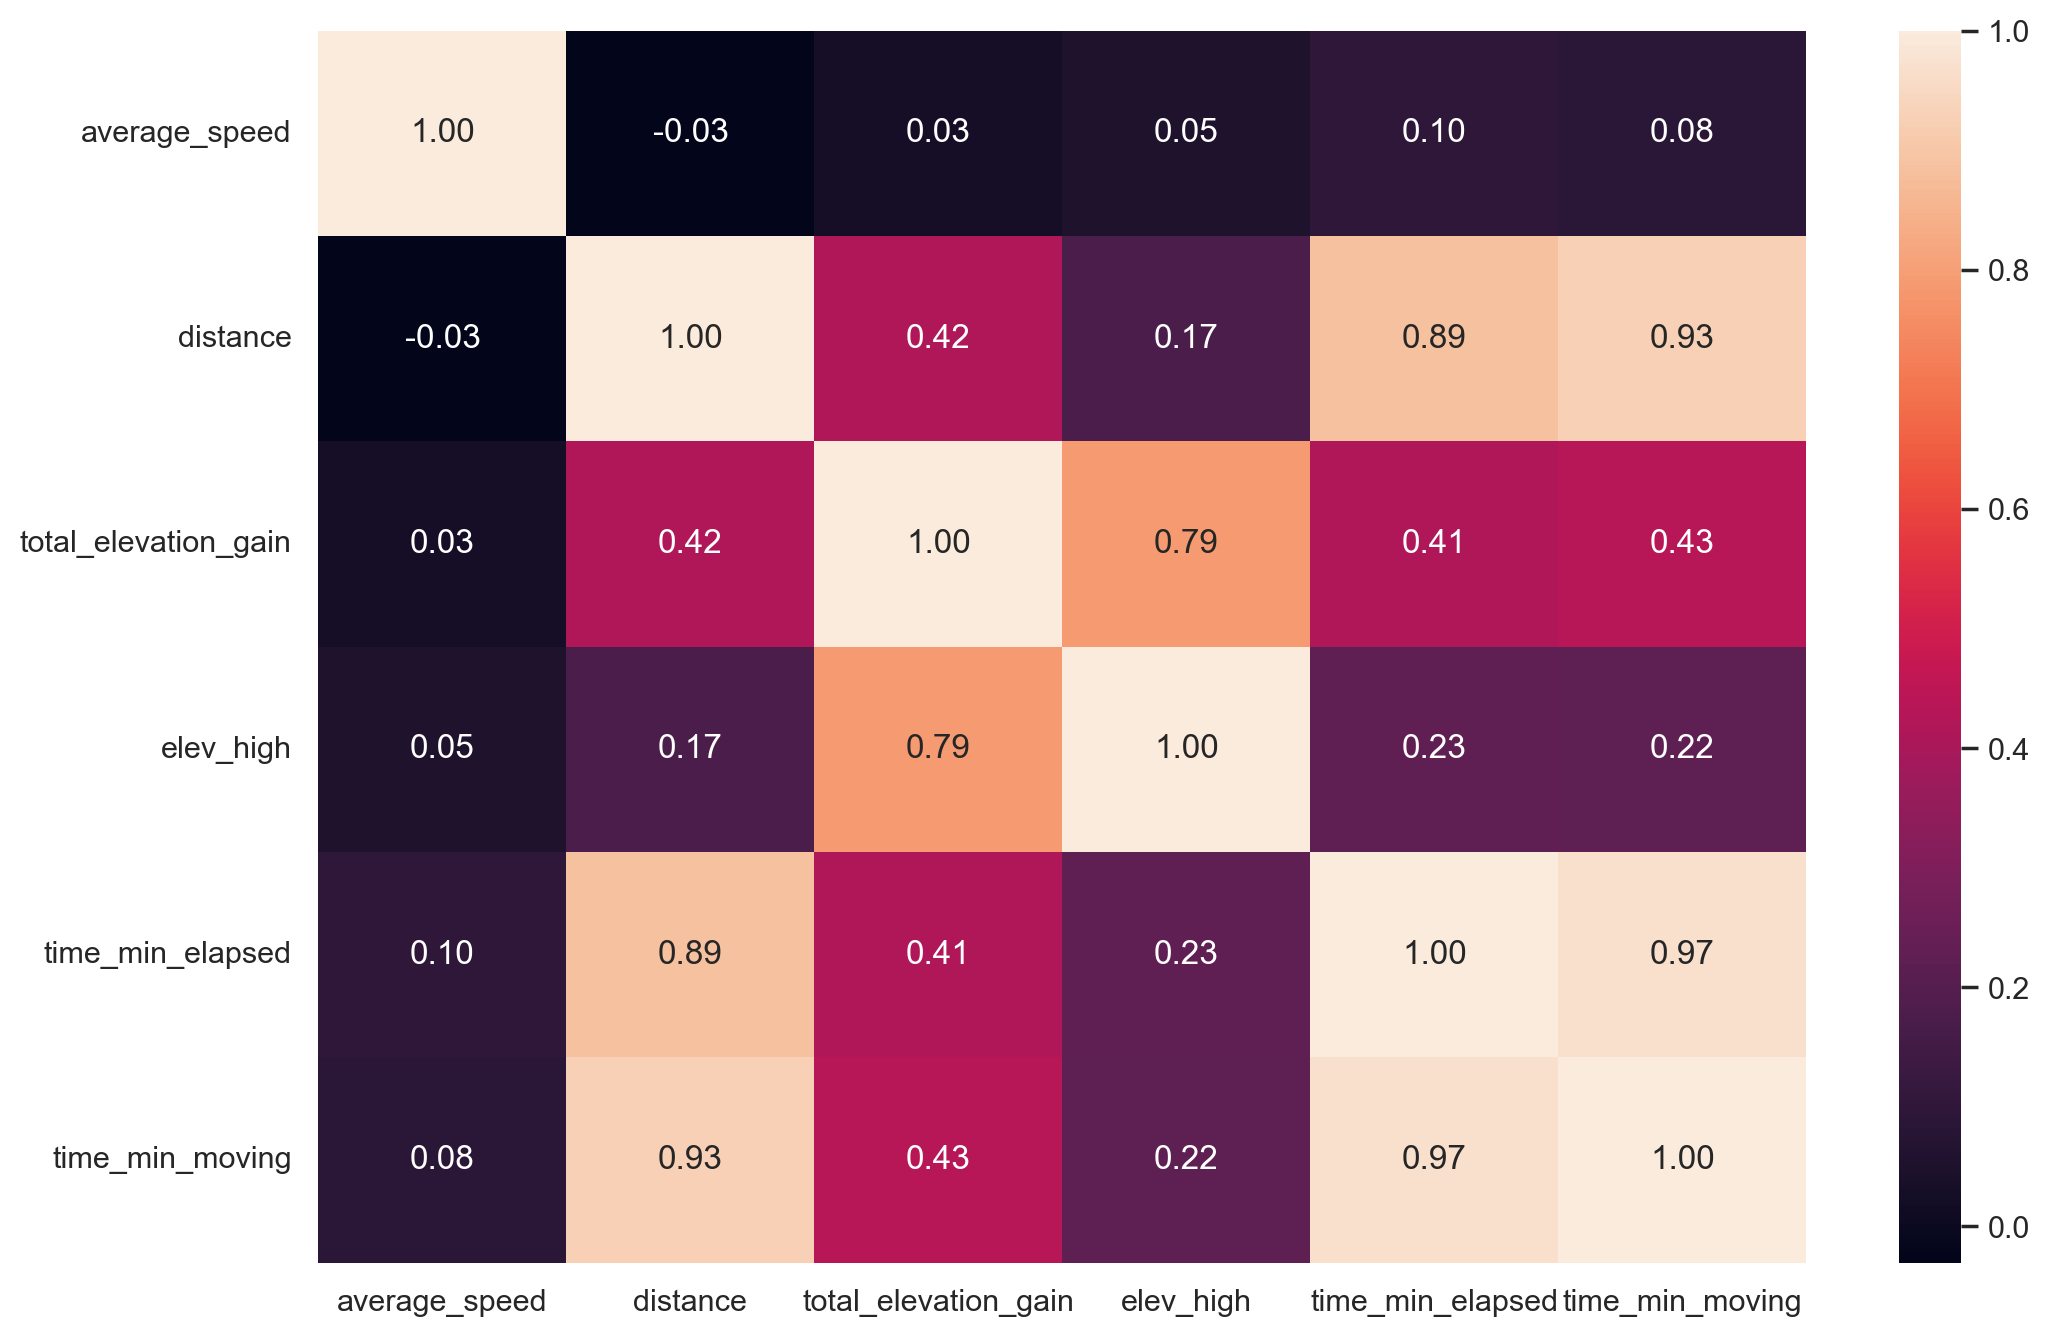

In [45]:
corr = data.corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr, annot=True, fmt=".2f");

In [46]:
trends = data.copy()

In [47]:
trends.set_index(pd.to_datetime(trends.index), drop=True, inplace=True)

In [48]:
trends['weekday'] = trends.index.map(lambda x: x.weekday)

In [49]:
trends

,average_speed,distance,total_elevation_gain,elev_high,time_min_elapsed,time_min_moving,weekday
start_date_local,,,,,,,
2020-01-18 12:00:36,5.30,11.44,73.0,115.0,63.83,60.70,5
2020-01-17 19:00:58,4.89,9.49,36.1,96.9,48.85,46.37,4
2020-01-13 18:37:29,5.09,8.85,16.0,117.2,45.53,45.08,0
2020-01-10 18:36:52,5.11,7.72,10.0,131.6,39.58,39.47,4
2020-01-08 18:37:24,5.17,7.66,12.0,107.4,41.55,39.62,2
...,...,...,...,...,...,...,...
2016-03-05 11:10:45,6.96,12.68,11.1,92.0,91.08,88.27,5
2016-03-04 12:00:49,5.17,10.90,25.9,111.8,67.98,56.37,4
2016-02-03 07:33:56,4.53,16.43,56.8,120.7,81.42,74.45,2


In [50]:
trends.groupby('weekday').mean()

,average_speed,distance,total_elevation_gain,elev_high,time_min_elapsed,time_min_moving
weekday,,,,,,
0,5.952609,6.732899,89.992754,302.762319,42.277681,37.675217
1,7.930805,7.273624,238.726174,462.632215,54.356107,45.475436
2,6.177516,7.375155,126.849068,272.029193,54.590186,47.862609
3,6.413636,6.774000,66.177273,301.581818,46.181636,39.793636
4,6.322404,8.560000,365.066346,630.319231,62.924231,53.024038
5,6.575784,8.928541,466.516216,502.648649,72.308270,62.475730
6,6.292897,8.140276,211.599310,383.557241,57.765586,49.233517


<Axes: xlabel='weekday'>

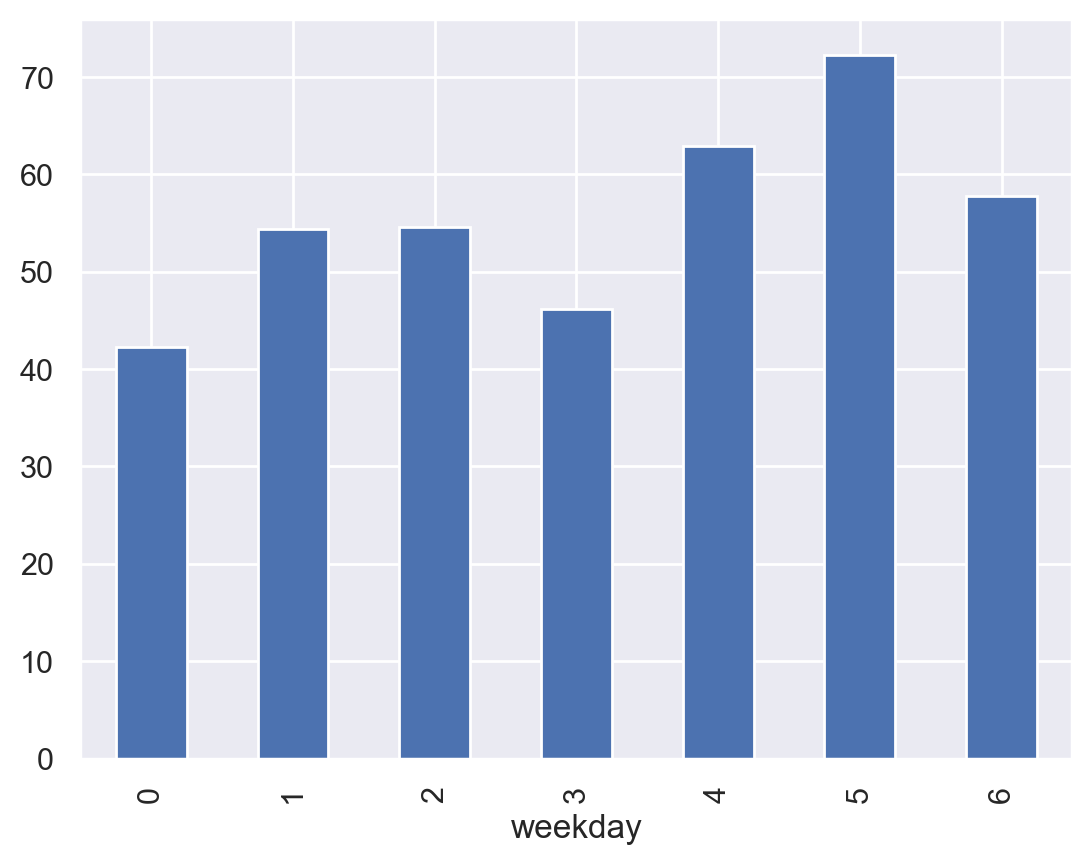

In [51]:
trends.groupby('weekday').mean()['time_min_elapsed'].plot.bar()

Text(0.5, 1.0, 'Average training time by day of the week')

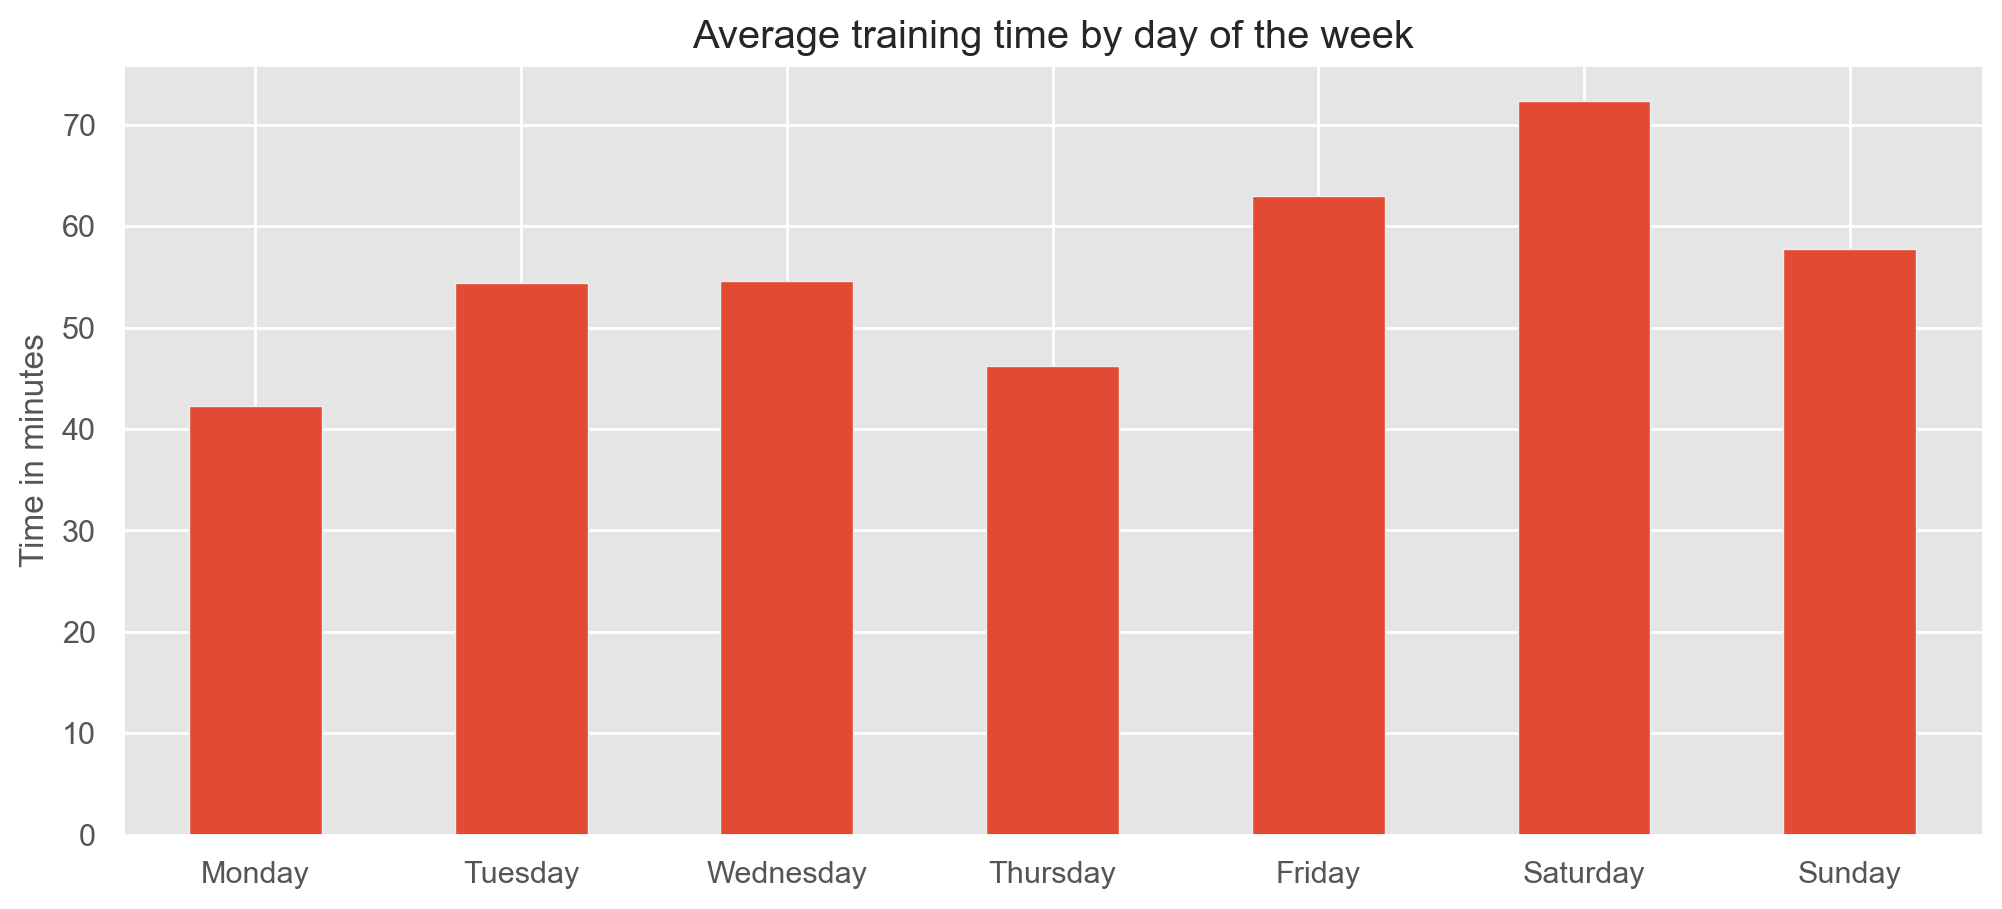

In [52]:
import calendar
list(calendar.day_name)

plt.style.use('ggplot')

trends.groupby('weekday').mean()['time_min_elapsed'].plot(kind='bar', figsize=(12,5))
plt.xticks(list(range(7)), list(calendar.day_name), rotation='horizontal')
plt.xlabel('')
plt.ylabel('Time in minutes')
plt.title('Average training time by day of the week')

In [53]:
trends['year'] = trends.index.map(lambda x: x.year)

In [54]:
trends['year'].value_counts()

year
2016    288
2019    252
2017    195
2018    176
2020     11
2010      1
Name: count, dtype: int64

In [55]:
trends.groupby('year').mean()

,average_speed,distance,total_elevation_gain,elev_high,time_min_elapsed,time_min_moving,weekday
year,,,,,,,
2010,6.000000,103.250000,6987.800000,1646.000000,618.920000,618.920000,4.000000
2016,7.406146,7.386042,148.655556,457.228472,54.861111,46.254792,3.256944
2017,7.074359,7.245641,191.233846,412.958974,68.549795,53.164154,3.297436
2018,5.544091,7.348693,93.961932,166.086932,44.240284,40.681477,3.125000
2019,6.056190,8.625873,476.415079,539.564683,59.883413,54.415159,3.333333
2020,5.330000,8.438182,68.281818,172.372727,47.212727,44.555455,3.363636


<Axes: xlabel='year'>

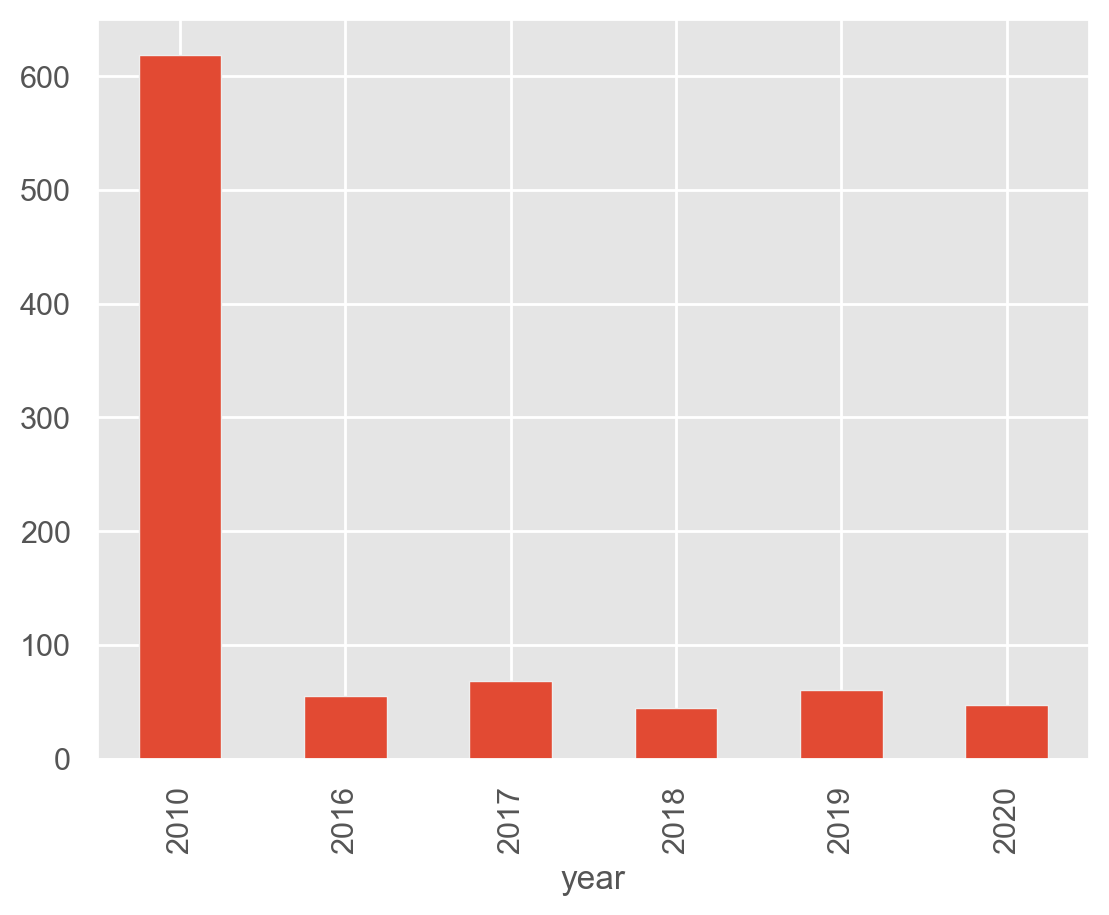

In [56]:
trends.groupby('year').mean()['time_min_elapsed'].plot(kind='bar')

In [57]:
data.head()

,average_speed,distance,total_elevation_gain,elev_high,time_min_elapsed,time_min_moving
start_date_local,,,,,,
2020-01-18 12:00:36,5.30,11.44,73.0,115.0,63.83,60.70
2020-01-17 19:00:58,4.89,9.49,36.1,96.9,48.85,46.37
2020-01-13 18:37:29,5.09,8.85,16.0,117.2,45.53,45.08
2020-01-10 18:36:52,5.11,7.72,10.0,131.6,39.58,39.47
2020-01-08 18:37:24,5.17,7.66,12.0,107.4,41.55,39.62


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


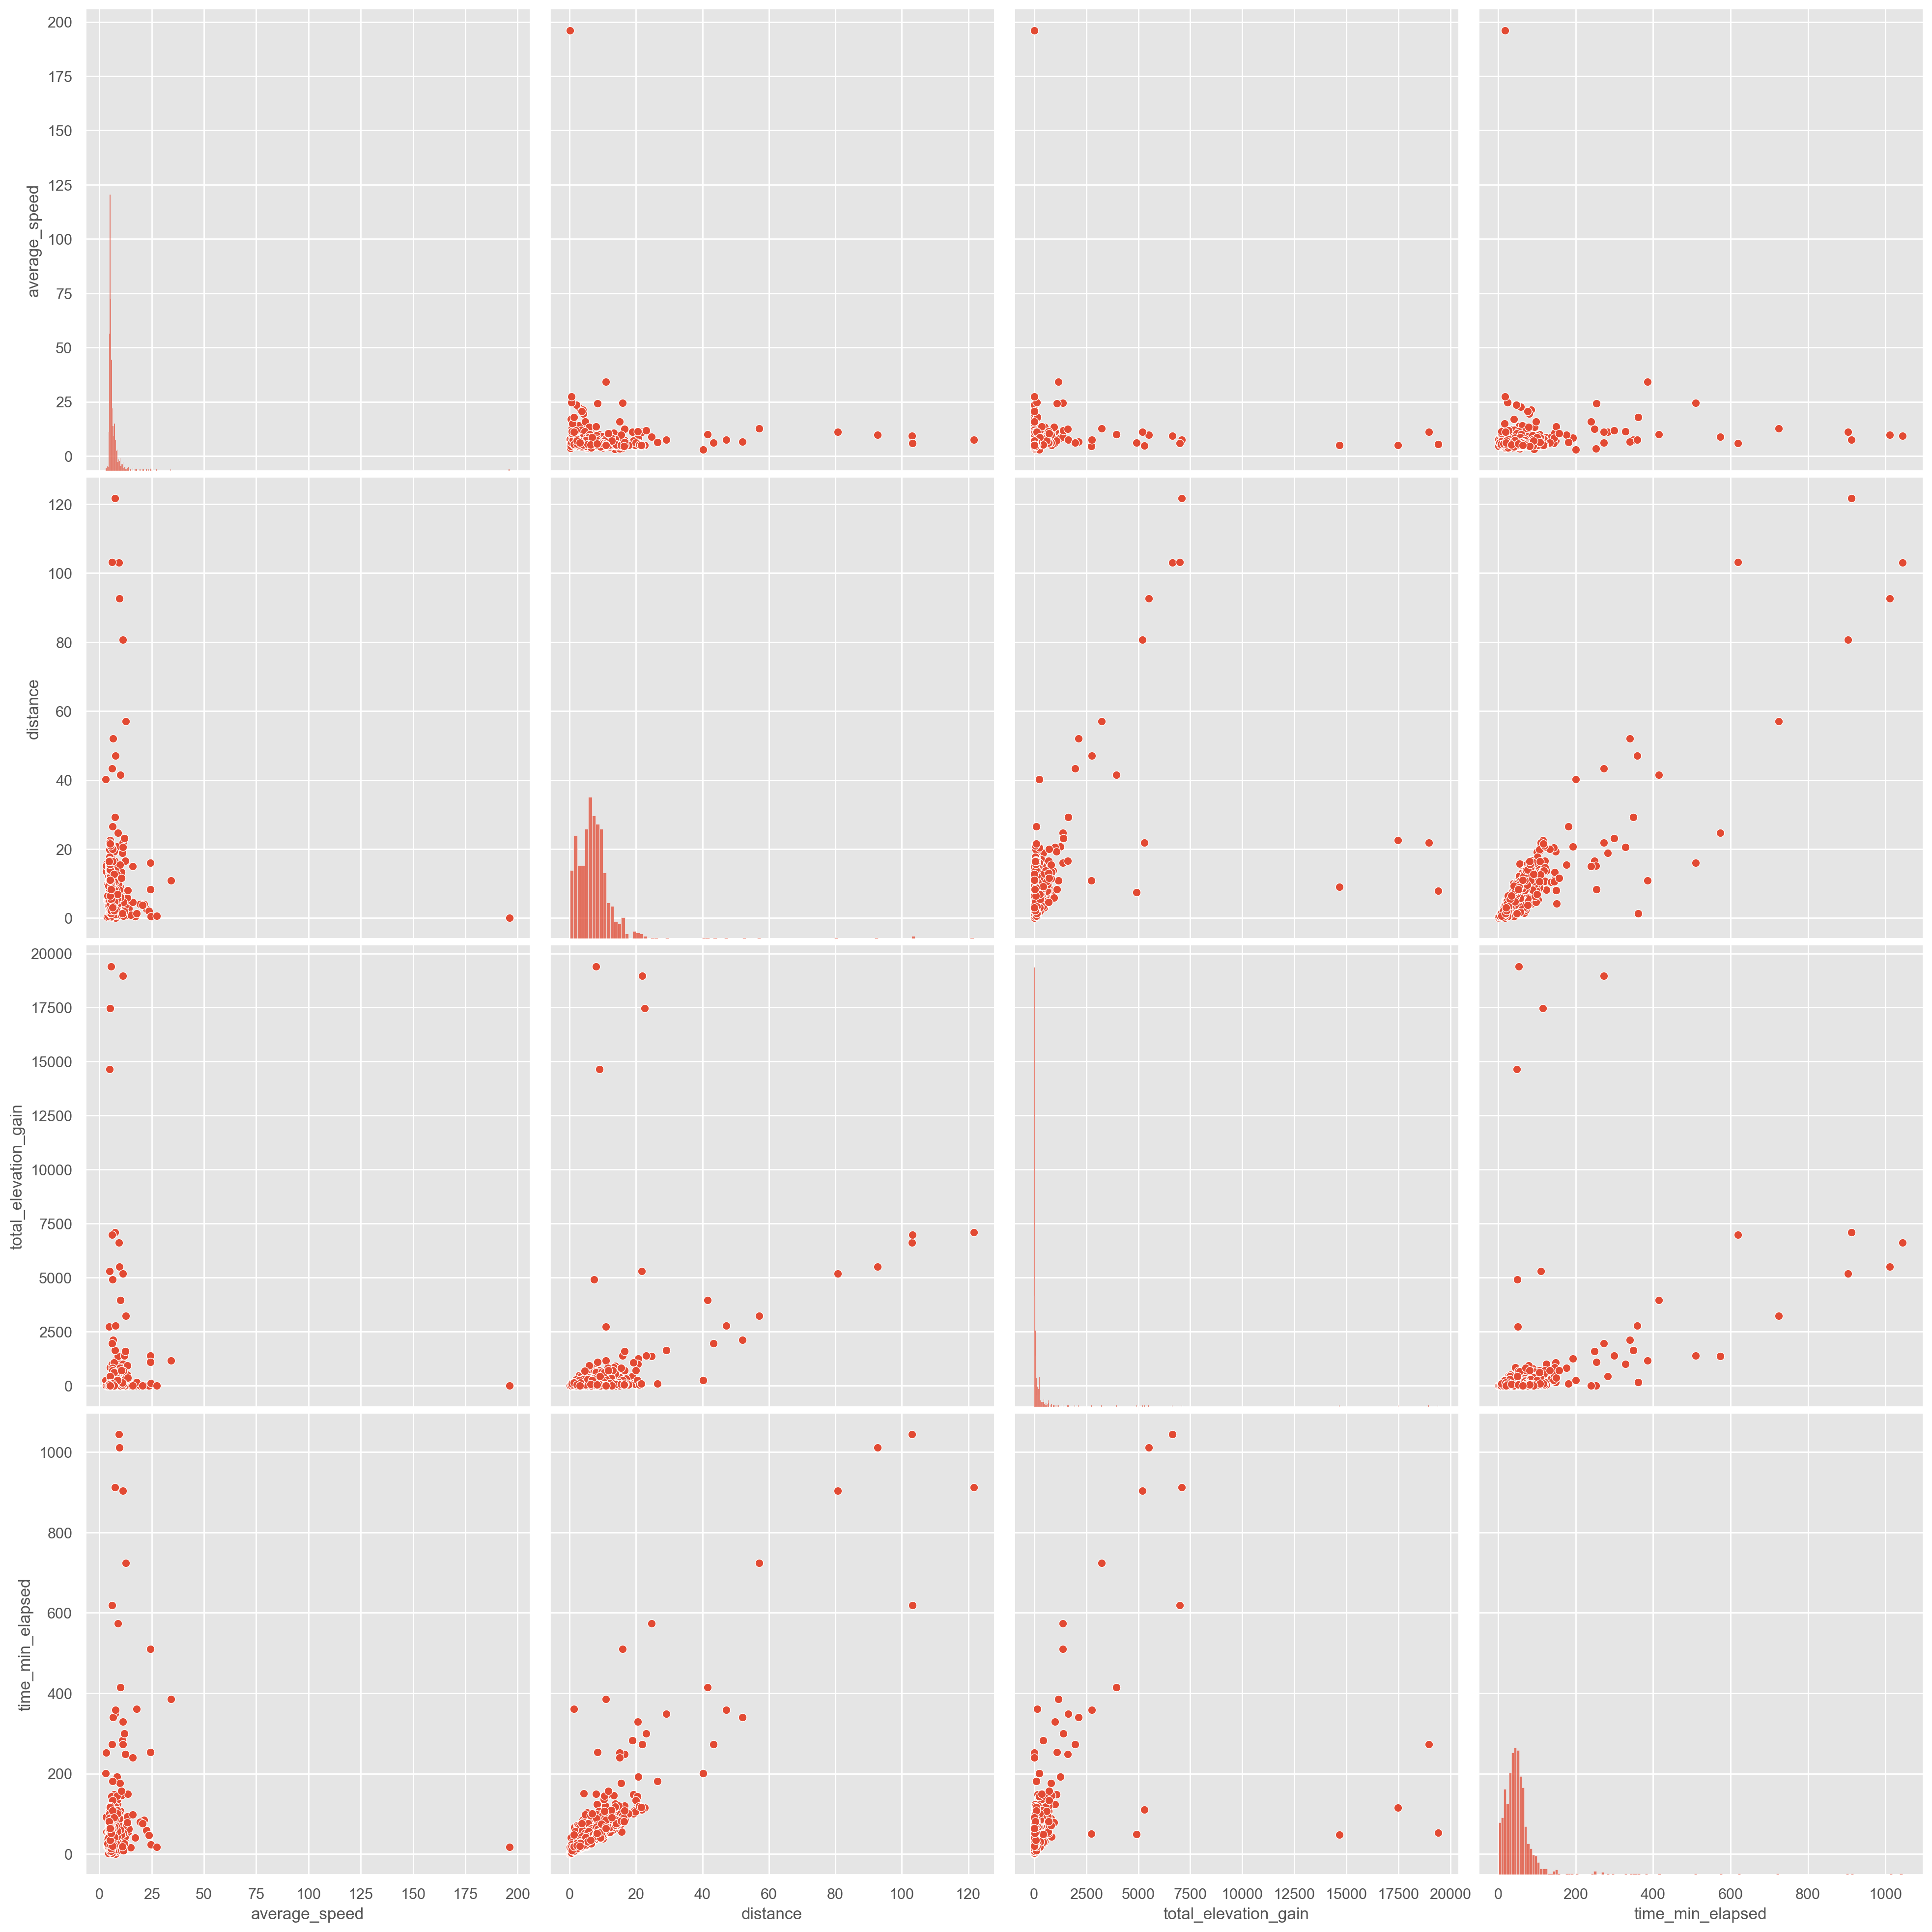

In [58]:
cols = ['average_speed','distance','total_elevation_gain','time_min_elapsed']
sns.pairplot(x_vars=cols, y_vars=cols, data=data, size=5)

In [59]:
import sklearn
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(data)

In [60]:
data_scaled = pd.DataFrame(X, columns=['average_speed', 'distance', 'total_elevation_gain', 'elev_high', 'time_min_elapsed', 'time_min_moving'])

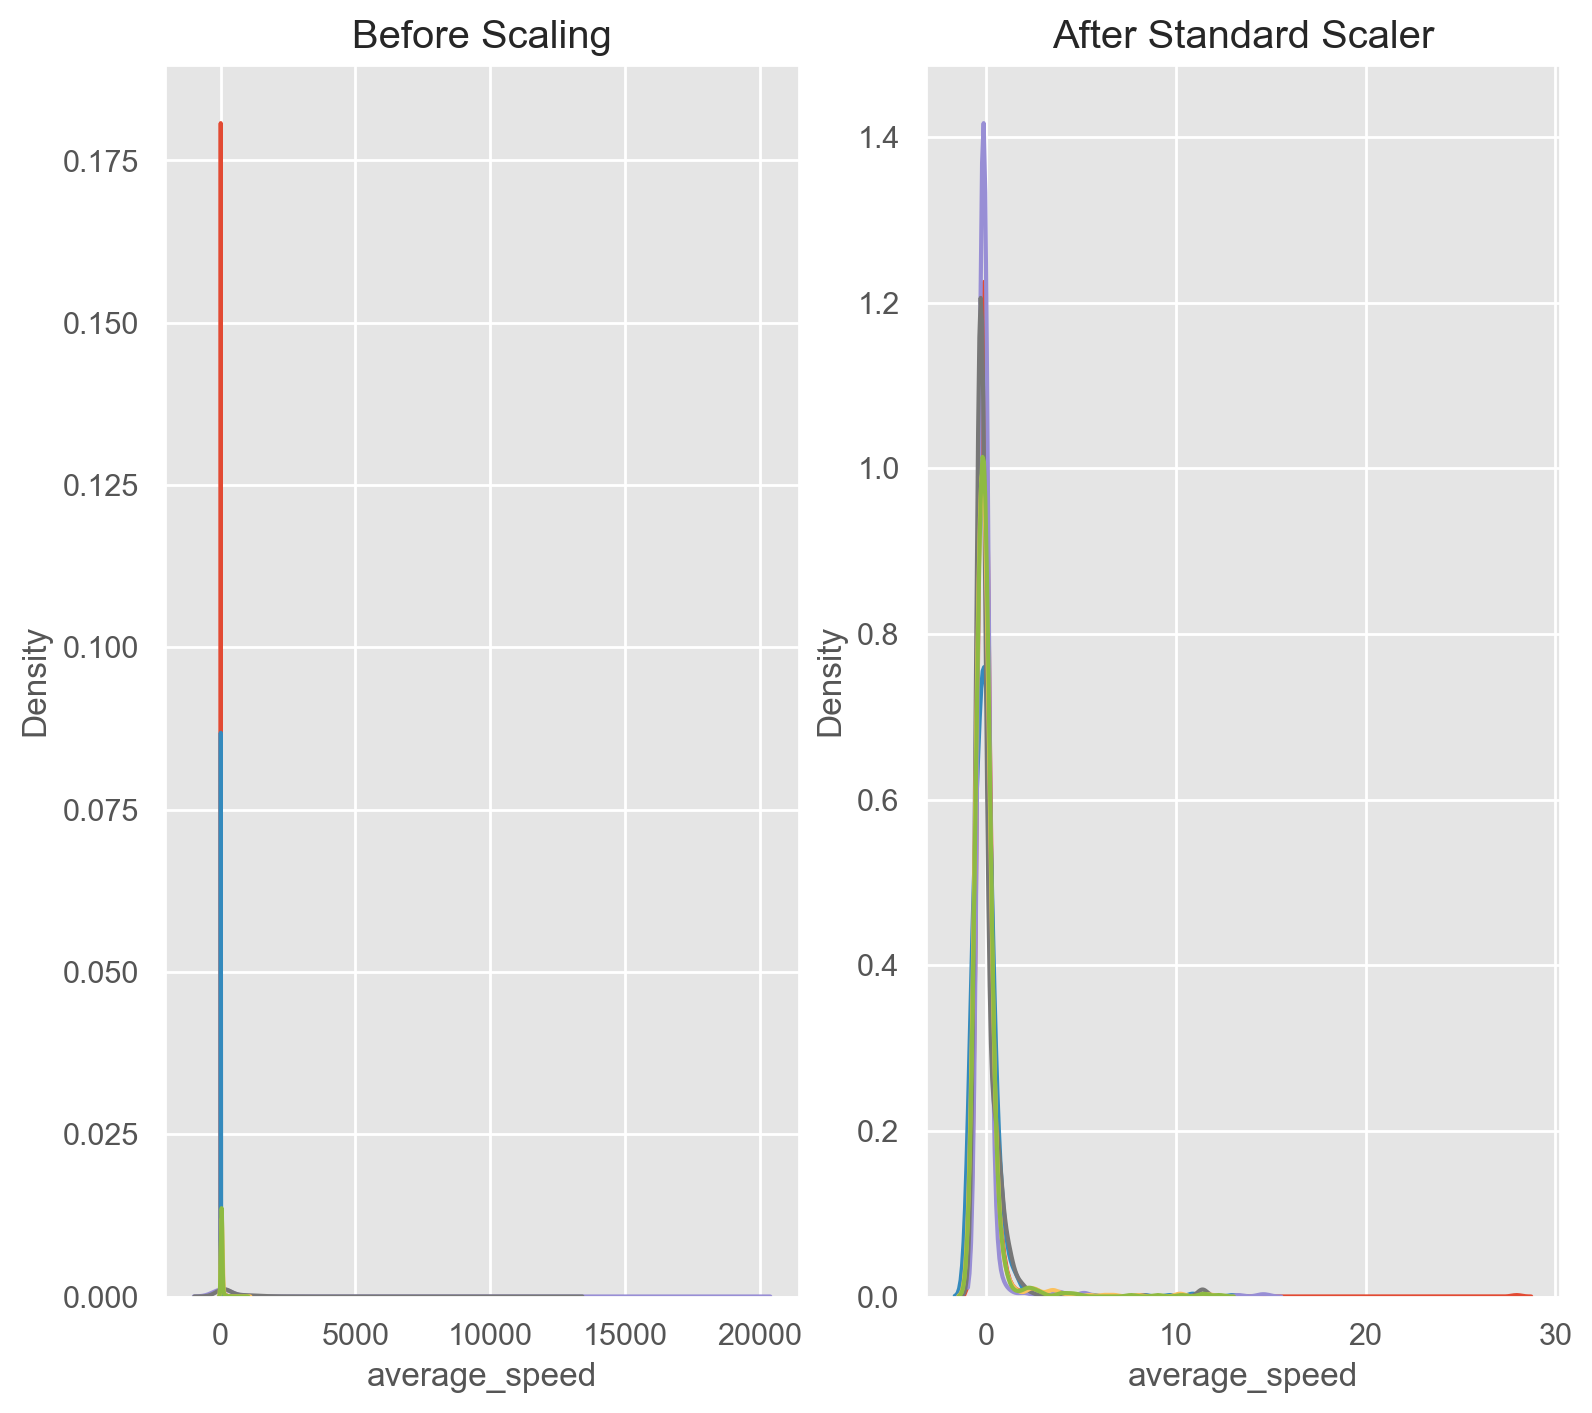

In [61]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(9,8))

ax1.set_title('Before Scaling')
sns.kdeplot(data['average_speed'], ax=ax1)
sns.kdeplot(data['distance'], ax=ax1)
sns.kdeplot(data['total_elevation_gain'], ax=ax1)
sns.kdeplot(data['elev_high'], ax=ax1)
sns.kdeplot(data['time_min_elapsed'], ax=ax1)
sns.kdeplot(data['time_min_moving'], ax=ax1)

ax2.set_title('After Standard Scaler')
sns.kdeplot(data_scaled['average_speed'], ax=ax2)
sns.kdeplot(data_scaled['distance'], ax=ax2)
sns.kdeplot(data_scaled['total_elevation_gain'], ax=ax2)
sns.kdeplot(data_scaled['elev_high'], ax=ax2)
sns.kdeplot(data_scaled['time_min_elapsed'], ax=ax2)
sns.kdeplot(data_scaled['time_min_moving'], ax=ax2)

plt.show()

In [62]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5)
model.fit(X)
data['Cluster'] = model.labels_

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [63]:
data['Cluster'].value_counts()

Cluster
0    887
4     25
1      6
2      4
3      1
Name: count, dtype: int64

In [64]:
data.groupby('Cluster').mean()

,average_speed,distance,total_elevation_gain,elev_high,time_min_elapsed,time_min_moving
Cluster,,,,,,
0,6.226404,6.790147,97.258737,294.665614,46.075603,39.627971
1,9.401667,93.075000,5774.000000,1977.933333,868.610000,822.615000
2,6.672500,15.320000,17620.750000,12603.850000,122.230000,111.570000
3,196.080000,0.090000,0.000000,96.500000,17.270000,16.850000
4,11.080800,22.422400,1321.628000,2288.184000,263.818800,204.846000


In [65]:
data.groupby('Cluster').std()

,average_speed,distance,total_elevation_gain,elev_high,time_min_elapsed,time_min_moving
Cluster,,,,,,
0,2.249838,3.925702,234.251367,412.740800,26.770377,22.281053
1,2.418937,22.238126,1470.741913,337.821626,165.617242,130.704059
2,3.034341,7.939874,2142.243742,2.217356,105.013418,94.646463
3,NaN,NaN,NaN,NaN,NaN,NaN
4,7.297304,13.282085,1226.892711,2833.821848,132.566213,108.370649


In [66]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

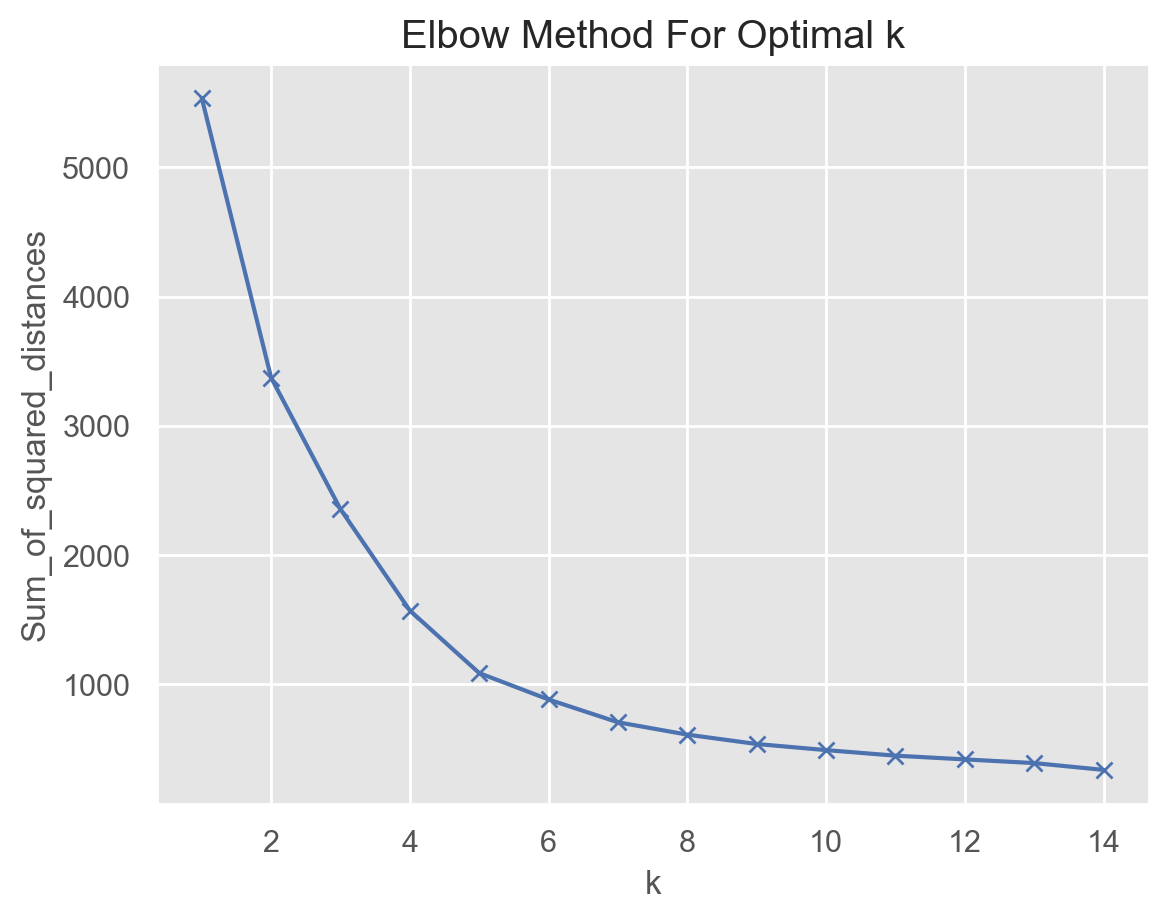

In [67]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [68]:
data.groupby('Cluster').mean()

,average_speed,distance,total_elevation_gain,elev_high,time_min_elapsed,time_min_moving
Cluster,,,,,,
0,6.226404,6.790147,97.258737,294.665614,46.075603,39.627971
1,9.401667,93.075000,5774.000000,1977.933333,868.610000,822.615000
2,6.672500,15.320000,17620.750000,12603.850000,122.230000,111.570000
3,196.080000,0.090000,0.000000,96.500000,17.270000,16.850000
4,11.080800,22.422400,1321.628000,2288.184000,263.818800,204.846000


In [69]:
data['Cluster'].value_counts()

Cluster
0    887
4     25
1      6
2      4
3      1
Name: count, dtype: int64

In [70]:
data[data['Cluster'] == 2]

,average_speed,distance,total_elevation_gain,elev_high,time_min_elapsed,time_min_moving,Cluster
start_date_local,,,,,,,
2019-05-04 08:57:20,5.48,7.90,19401.0,12600.6,53.25,43.30,2
2019-04-13 11:16:43,5.09,22.54,17469.0,12604.6,114.80,114.17,2
2019-03-19 18:50:51,4.91,9.02,14656.0,12605.6,47.85,44.28,2
2019-03-15 10:21:22,11.21,21.82,18957.0,12604.6,273.02,244.53,2


In [71]:
data[data['Cluster'] == 1]

,average_speed,distance,total_elevation_gain,elev_high,time_min_elapsed,time_min_moving,Cluster
start_date_local,,,,,,,
2019-08-28 21:21:13,12.68,57.05,3230.0,2104.2,723.75,723.38,1
2019-08-28 04:01:22,9.69,92.69,5512.0,2551.0,1010.53,898.23,1
2019-06-08 05:00:47,11.19,80.69,5194.0,1994.2,903.32,818.07,1
2017-07-01 06:00:11,9.36,103.11,6630.0,1640.8,1043.62,965.57,1
2016-11-01 00:00:00,7.49,121.66,7090.2,1931.4,911.52,911.52,1
2010-01-01 01:00:00,6.00,103.25,6987.8,1646.0,618.92,618.92,1


In [72]:
data[data['Cluster'] == 4]

,average_speed,distance,total_elevation_gain,elev_high,time_min_elapsed,time_min_moving,Cluster
start_date_local,,,,,,,
2019-12-29 10:49:10,11.04,18.88,440.0,1000.4,282.40,208.40,4
2019-06-21 16:03:20,8.42,20.66,1262.0,1824.0,192.38,173.95,4
2019-03-22 18:03:21,4.42,12.34,0.0,9150.0,54.98,54.53,4
2019-03-10 16:51:20,4.83,21.78,5302.0,5176.4,110.25,105.22,4
2018-11-17 03:57:52,9.95,41.52,3956.0,1058.8,415.18,413.03,4
2018-08-11 10:45:04,6.04,20.52,996.0,1182.4,123.97,123.97,4
2017-11-11 08:01:05,11.30,20.52,1007.0,827.0,329.00,231.78,4
2017-09-09 07:55:17,34.22,10.91,1170.0,2292.6,385.90,372.98,4
2017-09-08 09:27:02,24.37,15.93,1380.0,2089.4,509.92,388.30,4
